In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]] 

 [[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]]


Solution
===

In [3]:
def naive(p, q):
    res = np.zeros((p.shape[0], q.shape[0]))
    
    for i in range(0, p.shape[0]):
        for j in range(0, q.shape[0]):
            res[i, j] = np.sqrt((p[i, 0] - q[j, 0]) ** 2 + (p[i, 1] - q[j, 1]) ** 2)
    
    return res
    
naive(p, q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [4]:
a = np.random.randint(0, 10, size=(2,3,4,5))
a

array([[[[7, 3, 3, 2, 4],
         [9, 3, 4, 1, 8],
         [0, 6, 4, 1, 1],
         [0, 7, 7, 0, 5]],

        [[1, 5, 3, 0, 6],
         [9, 6, 3, 9, 6],
         [3, 3, 5, 5, 4],
         [9, 5, 9, 0, 2]],

        [[7, 0, 7, 0, 1],
         [8, 0, 9, 2, 1],
         [6, 7, 5, 8, 4],
         [7, 1, 3, 8, 7]]],


       [[[6, 8, 3, 6, 7],
         [3, 0, 3, 6, 1],
         [6, 4, 0, 6, 2],
         [2, 9, 6, 5, 4]],

        [[6, 0, 4, 0, 1],
         [2, 8, 3, 9, 3],
         [0, 4, 9, 8, 7],
         [7, 1, 0, 8, 6]],

        [[0, 7, 0, 4, 2],
         [8, 1, 4, 4, 1],
         [3, 7, 1, 6, 7],
         [2, 7, 1, 4, 8]]]])

In [5]:
rows, cols, layers, arrs = np.indices(a.shape)
a[rows, 1, 0, arrs]

array([[[[1, 5, 3, 0, 6],
         [1, 5, 3, 0, 6],
         [1, 5, 3, 0, 6],
         [1, 5, 3, 0, 6]],

        [[1, 5, 3, 0, 6],
         [1, 5, 3, 0, 6],
         [1, 5, 3, 0, 6],
         [1, 5, 3, 0, 6]],

        [[1, 5, 3, 0, 6],
         [1, 5, 3, 0, 6],
         [1, 5, 3, 0, 6],
         [1, 5, 3, 0, 6]]],


       [[[6, 0, 4, 0, 1],
         [6, 0, 4, 0, 1],
         [6, 0, 4, 0, 1],
         [6, 0, 4, 0, 1]],

        [[6, 0, 4, 0, 1],
         [6, 0, 4, 0, 1],
         [6, 0, 4, 0, 1],
         [6, 0, 4, 0, 1]],

        [[6, 0, 4, 0, 1],
         [6, 0, 4, 0, 1],
         [6, 0, 4, 0, 1],
         [6, 0, 4, 0, 1]]]])

In [6]:
a[:, 1, 0, :]

array([[1, 5, 3, 0, 6],
       [6, 0, 4, 0, 1]])

=> Using indices is useful to slice the array while retaining its original shape (thus duplicating the interesting slice on the other axes).

In [7]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [8]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.77132064 0.02075195]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.63364823 0.74880388]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.49850701 0.22479665]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]
 [0.19806286 0.76053071]]

[[0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607]
 [0.16911084 0.08833981]
 [0.68535982 0.95339335]
 [0.00394827 0.51219226]
 [0.81262096 0.61252607]
 [0.72175532 0.29187607

In [9]:
def with_indices(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    res = np.sqrt(((p[rows.ravel()] - q[cols.ravel()]) ** 2).sum(axis=1)).reshape(p.shape[0], q.shape[0])
    return res

with_indices(p, q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [10]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

scipy_version(p, q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

### Numpy Magic

In [11]:
print(p[:, None, :].shape)
print(q[None, :, :].shape)

p2 = p[:, None, :]
q2 = q[None, :, :]

(p2 + q2).shape

(4, 1, 2)
(1, 5, 2)


(4, 5, 2)

In [12]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

tensor_broadcasting(p, q)

array([[0.60599073, 0.93659449, 0.91124856, 0.59321356, 0.27561751],
       [0.80746999, 0.21102354, 0.67268649, 0.22495084, 0.46534491],
       [0.35654215, 0.75217493, 0.57200052, 0.49900068, 0.23310825],
       [0.67281411, 0.52407472, 0.31520226, 0.63212897, 0.70277376]])

# Compare methods

In [13]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

27.7 ms ± 510 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
4.84 ms ± 92 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
433 µs ± 4.07 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.99 ms ± 23.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


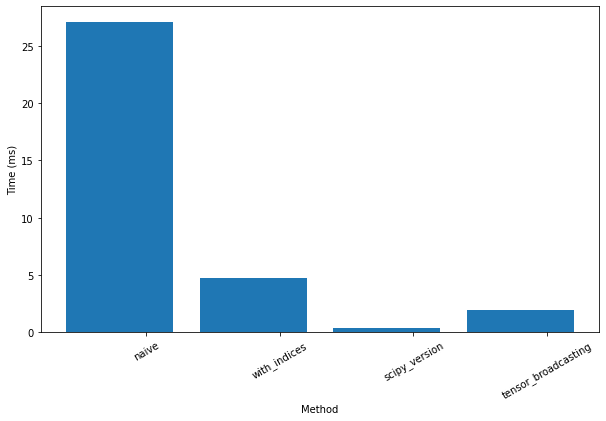

In [14]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')
plt.show()